In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
data = pd.read_csv('/content/tesla_2018_data (2).csv')


prices = data['Close'].values.reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)


def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
    return np.array(sequences)


sequence_length = 10  # Choose an appropriate sequence length
X = create_sequences(prices_normalized, sequence_length)
train_size = int(len(X) * 0.7)
X_train = X[:train_size]
X_test = X[train_size:]

# Prepare labels (shifted by one day)
y_train = prices_normalized[sequence_length:train_size + sequence_length]
y_test = prices_normalized[train_size + sequence_length:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error (MSE) on test data: {loss}')


predictions = model.predict(X_test)

# Inverse transform to get actual prices
predictions_actual = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)




Epoch 1/10
17/17 [==============================] - 4s 11ms/step - loss: 0.0168
Epoch 2/10
17/17 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 3/10
17/17 [==============================] - 0s 12ms/step - loss: 8.6249e-04
Epoch 4/10
17/17 [==============================] - 0s 13ms/step - loss: 5.1336e-04
Epoch 5/10
17/17 [==============================] - 0s 11ms/step - loss: 4.5903e-04
Epoch 6/10
17/17 [==============================] - 0s 11ms/step - loss: 4.3936e-04
Epoch 7/10
17/17 [==============================] - 0s 12ms/step - loss: 4.4410e-04
Epoch 8/10
17/17 [==============================] - 0s 12ms/step - loss: 4.6280e-04
Epoch 9/10
17/17 [==============================] - 0s 12ms/step - loss: 4.7045e-04
Epoch 10/10
7/7 [==============================] - 1s 5ms/step - loss: 0.0023
Mean Squared Error (MSE) on test data: 0.0023137154057621956
7/7 [==============================] - 1s 4ms/step


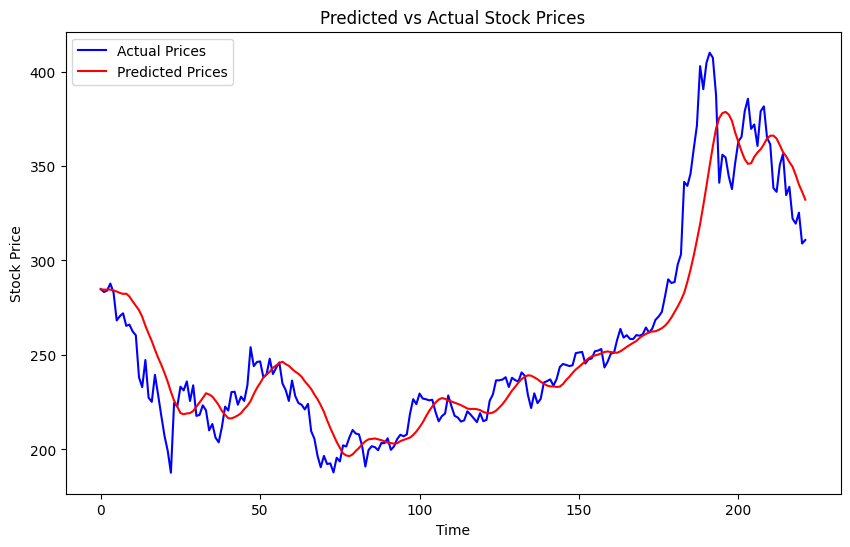

In [ ]:
import matplotlib.pyplot as plt

predictions_actual = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)


plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predictions_actual, color='red', label='Predicted Prices')
plt.title('Predicted vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


MSE: 0.0023137160184379456
RMSE: 0.048101102050139614
MAE: 0.033425908446725126


# Future Forcasting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


data = pd.read_csv('/content/tesla_2018_data (2).csv')
prices = data['Close'].values.reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)


sequence_length = 10


def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
    return np.array(sequences)

X_train = create_sequences(prices_normalized, sequence_length)
y_train = prices_normalized[sequence_length:]

# Reshape the sequences for LSTM model input
X_train_reshaped = X_train.reshape(-1, sequence_length, 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)

last_sequence = prices_normalized[-sequence_length:]

future_predictions = []
for i in range(5):
    last_sequence_reshaped = last_sequence.reshape(1, sequence_length, 1)
    next_day_prediction = model.predict(last_sequence_reshaped)
    future_predictions.append(next_day_prediction[0, 0])

    last_sequence = np.append(last_sequence[1:], next_day_prediction[0, 0])


actual_predicted_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


print("Predicted prices for the next 5 days:")
print(actual_predicted_prices.flatten())



Epoch 1/10
24/24 [==============================] - 5s 11ms/step - loss: 0.0333
Epoch 2/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 3/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 4/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 5/10
24/24 [==============================] - 1s 21ms/step - loss: 0.0011
Epoch 6/10
24/24 [==============================] - 0s 19ms/step - loss: 0.0010
Epoch 7/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0010
Epoch 8/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 9/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 10/10
1/1 [==============================] - 0s 21ms/step
Predicted prices for the next 5 days:
[322.8076  320.38885 317.47083 314.50204 312.96124]


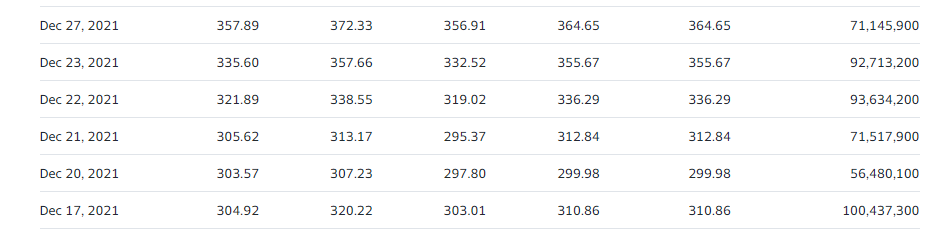